In [60]:
%config IPCompleter.greedy = True
#   Above is for the IntelliSense module to work.
import tensorflow as tf
#   To prevent a total meltdown of my GPU, restrictions needed to be made.
rtx2080 = tf.config.experimental.list_physical_devices('GPU')
for num in rtx2080:
    tf.config.experimental.set_memory_growth(num, True)
print('Go ahead')

Go ahead


In [61]:
%matplotlib inline
import random
import tensorflow as tf
from d2l import tensorflow as d2l

def ehe(w, b, num_examples):
    """ y = Xw + b + noise """
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1,1))) + b
    y += tf.random.normal(shape= y.shape, stddev= 0.01)
    y = tf.reshape(y, (-1,1))
    return X, y

#   Suppose W is [2, -3.4] and b of 4.2; with 1000 samples
true_w = tf.constant([2, -3.4], dtype=tf.float32)
true_b = 4.2
features, labels = ehe(true_w, true_b, 1000)
print('features:', features[0], '\nlabel', labels[0])

features: tf.Tensor([-1.1202368 -0.4552825], shape=(2,), dtype=float32) 
label tf.Tensor([3.499314], shape=(1,), dtype=float32)


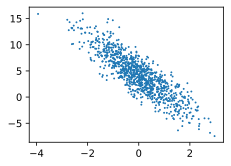

In [62]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1)

In [63]:
#   Now that we generated our shits, lets make her read it.

def readthisshit(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) #   For extra messy, so that it would be read randomly to generate that 'real world' feeling.
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i:min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

#   To make the GPU's job and our life easier, we would divide this into a parallel workflow.
batch_size = 10

w = tf.Variable(tf.random.normal(shape=(2,1), mean = 0, stddev = 0.01), trainable = True)
b = tf.Variable(tf.zeros(1), trainable = True)

#   Now lets calculate the loss through the use of automatic differentiation.
#   Defining the model as a linear one:
def linalg(X, w, b):
    #   Remember its Xw + b + eps (noise)
    return tf.matmul(X, w) + b

#   Now we'd define the loss function:
def losslossloss(yhat, y):
    #   This is otherwise known as the Squared Loss
    return (yhat - tf.reshape(y, yhat.shape))**2/2

#   And the optimization algorithm, which is the Minibatch StoChastic Gradient Descent
def optimize(params, grads, lr, batch_size):
    for param, grad in zip(params, grads):
        param.assign_sub(lr * grad / batch_size)
#   Remember that this is the very sense of ML, you initialize, compute gradient, update - and repeat.

In [64]:
#   Now lets train her
lr = 0.03
n_epoch = 10
net = linalg
loss = losslossloss

for epoch in range(n_epoch):
    for X, y in readthisshit(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)
        #   Compute Gradient
        dw, db = g.gradient(l, [w,b])
        #   Update the shit
        optimize([w,b],[dw,db],lr,batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f"epoc {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}")


epoc 1, loss 0.031969
epoc 2, loss 0.000109
epoc 3, loss 0.000053
epoc 4, loss 0.000053
epoc 5, loss 0.000053
epoc 6, loss 0.000053
epoc 7, loss 0.000053
epoc 8, loss 0.000053
epoc 9, loss 0.000053
epoc 10, loss 0.000053


In [65]:
print(f"Estimation error of w: {true_w - tf.reshape(w, true_w.shape)}")
print(f"Estimation error of b: {true_b - b}")

Estimation error of w: [-0.00050926 -0.00055385]
Estimation error of b: [-2.7656555e-05]
